In [1]:
%reload_ext autoreload
%autoreload 2

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [1]:
from markovsbi.bm.plot_utils import plot_metric_by_eval_steps, multi_plot, use_style
from functools import partial

import logging

logging.getLogger('matplotlib.font_manager').disabled = True

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
DEFAULT_COLORS = {"nle": "#1e81b0", "nre": "#9bf2fa", "diffusion": "#f2a900", "npe": "#060169"}

FIG_LENGTH_FULL = 14. # cm
FIG_LENGTH_INCHES = 14. /2.54

print(FIG_LENGTH_INCHES)


col_size = 1.6
row_size = 1.4

5.511811023622047


1.6
(3.2, 1.4)
(task=='lotka_volterra') & (metric=='c2st')
(task=='lotka_volterra') & (metric=='swd')


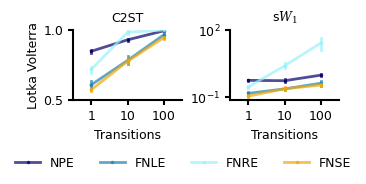

In [7]:
with use_style("pyloric"):

    fig, axes = multi_plot("../../results/bm_lv100k",  "metric", "task", partial(plot_metric_by_eval_steps, hue="method"), figsize_per_col=col_size, figsize_per_row=row_size, color_map=DEFAULT_COLORS, legend_ncol=4, legend_bbox_to_anchor=[0.5,-0.25])

    for ax in axes[:,1]:
        ax.set_yscale("log")
        ax.set_yticks([0.1,100])
    axes[0,0].set_yticks([0.5,1.])
        
    fig.savefig("lotka_volterra_metrics.svg", transparent=True, bbox_inches="tight")
fig

1.6
(3.2, 1.4)
(task=='sir') & (metric=='c2st')
(task=='sir') & (metric=='swd')


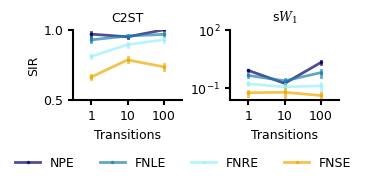

In [8]:
with use_style("pyloric"):

    fig, axes = multi_plot("../../results/bm_sir100k",  "metric", "task", partial(plot_metric_by_eval_steps, hue="method"), figsize_per_col=col_size, figsize_per_row=row_size, color_map=DEFAULT_COLORS, legend_ncol=4, legend_bbox_to_anchor=[0.5,-0.25])

    for ax in axes[:,1]:
        ax.set_yscale("log")
        ax.set_yticks([0.1,100])
    axes[0,0].set_yticks([0.5,1.])
        
    fig.savefig("sir_metrics.svg", transparent=True, bbox_inches="tight")
fig

In [41]:
from markovsbi.bm.data_utils import query, load_model

In [42]:
df = query("../../results/bm_lv100k", metric="swd")

(metric=='swd')


In [43]:
df.sort_values("value").head(10)

,method,sampler,task,num_simulations,num_steps,seed,model_id,metric,value,eval_num_steps,time_train,time_eval,cfg
96,diffusion,em_gaus,lotka_volterra,100000,2,0,16,swd,0.102289,2,1508.185389,0.462129,"{'name': 'bm_lv100k', 'seed': 0, 'model_id': N..."
108,diffusion,em_gaus,lotka_volterra,100000,2,2,18,swd,0.102641,2,1925.870835,0.471473,"{'name': 'bm_lv100k', 'seed': 2, 'model_id': N..."
114,diffusion,em_gaus,lotka_volterra,100000,2,3,19,swd,0.109345,2,1971.372682,0.481121,"{'name': 'bm_lv100k', 'seed': 3, 'model_id': N..."
138,nle,mcmc,lotka_volterra,100000,2,3,23,swd,0.111633,2,447.302820,29.423648,"{'name': 'bm_lv100k', 'seed': 3, 'model_id': N..."
30,nle,mcmc,lotka_volterra,100000,2,3,5,swd,0.111633,2,489.163353,29.180128,"{'name': 'bm_lv100k', 'seed': 3, 'model_id': N..."
102,diffusion,em_gaus,lotka_volterra,100000,2,1,17,swd,0.112107,2,1508.763695,0.461584,"{'name': 'bm_lv100k', 'seed': 1, 'model_id': N..."
126,nle,mcmc,lotka_volterra,100000,2,2,21,swd,0.112821,2,433.638204,33.101728,"{'name': 'bm_lv100k', 'seed': 2, 'model_id': N..."
54,nle,mcmc,lotka_volterra,100000,2,2,9,swd,0.112821,2,499.056388,35.712402,"{'name': 'bm_lv100k', 'seed': 2, 'model_id': N..."
90,diffusion,em_gaus,lotka_volterra,100000,2,4,15,swd,0.131997,2,839.079226,0.299405,"{'name': 'bm_lv100k', 'seed': 4, 'model_id': N..."
144,nle,mcmc,lotka_volterra,100000,2,4,24,swd,0.136296,2,730.866068,40.830955,"{'name': 'bm_lv100k', 'seed': 4, 'model_id': N..."


In [70]:
model = load_model("../../results/bm_lv100k",16)

In [71]:
from markovsbi.tasks import SIR, LotkaVolterra
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

task = LotkaVolterra()
prior = task.get_prior()
simulator = task.get_simulator()

In [72]:
theta_o = prior.sample(jax.random.key(1))
x_o = simulator(jax.random.key(3), theta_o, 101)

In [73]:
plt.plot(x_o)

In [74]:
samples1 = model.sample(50_000,x_o=x_o[:2], rng=jax.random.key(0))
samples2 = model.sample(50_000,x_o=x_o[:11], rng=jax.random.key(1))
samples3 = model.sample(50_000,x_o=x_o, rng=jax.random.key(2))

In [75]:
x_pred1 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(3), 50_000), samples1, 100)
x_pred2 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(4), 50_000), samples2, 100)
x_pred3 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(5), 50_000), samples3, 100)


x_l1 = jnp.quantile(x_pred1, 0.05, axis=0)
x_u1 = jnp.quantile(x_pred1, 0.95, axis=0)

x_l2 = jnp.quantile(x_pred2, 0.05, axis=0)
x_u2 = jnp.quantile(x_pred2, 0.95, axis=0)

x_l3 = jnp.quantile(x_pred3, 0.05, axis=0)
x_u3 = jnp.quantile(x_pred3, 0.95, axis=0)

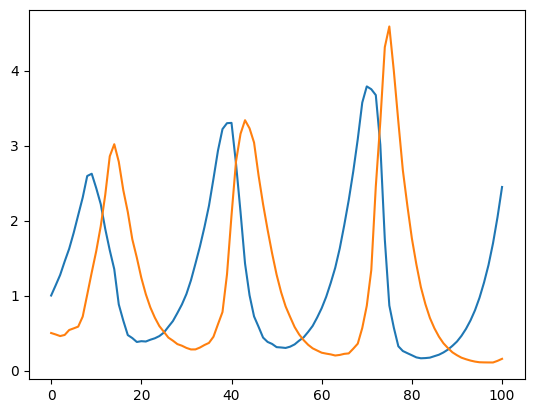

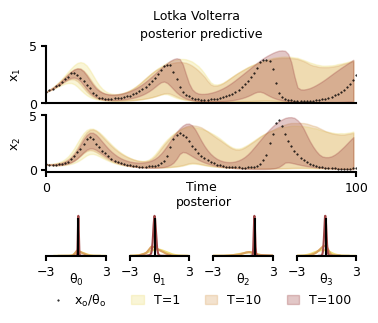

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Assuming these variables are defined elsewhere in your code
# x_o, x_l1, x_u1, x_l2, x_u2, x_l3, x_u3, samples1, samples2, samples3, theta_o

# Viridis
# color1 = "#440154"
# color2 = "#5ec962"
# color3 = "#fde725"

# color1 = "#1a2766"
# color2 = "#ae1b1e"
# color3 = "#fc9f32"

color1 = "#EEDF7A"
color2 = "#D8A25E"
color3 = "#A04747"

lw = None

with use_style("pyloric"):
    fig = plt.figure(figsize=(4., 2.8))

    # GridSpec for the top two rows
    gs_top = GridSpec(2, 1, figure=fig, height_ratios=[1., 1.], hspace=0.2, top=0.85, bottom=0.4)

    # Subplots for the top two rows
    top_plot1 = fig.add_subplot(gs_top[0])
    top_plot1.set_xticks([])
    top_plot1.set_xticklabels([])
    top_plot1.plot(x_o[:, 0], marker=".", linestyle="", color="black", markersize=1)
    top_plot1.fill_between(jnp.arange(100), x_l1[:, 0], x_u1[:,0], color=color1, alpha=0.3)
    top_plot1.fill_between(jnp.arange(100), x_l2[:, 0], x_u2[:,0], color=color2, alpha=0.3)
    top_plot1.fill_between(jnp.arange(100), x_l3[:, 0], x_u3[:,0], color=color3, alpha=0.3)
    # top_plot1.plot(x_l1[:, 0], color=color1, alpha=0.9, lw=lw)
    # top_plot1.plot(x_u1[:, 0], color=color1, alpha=0.9, lw=lw)
    # top_plot1.plot(x_l2[:, 0], color=color2, alpha=0.9, lw=lw)
    # top_plot1.plot(x_u2[:, 0], color=color2, alpha=0.9, lw=lw)
    # top_plot1.plot(x_l3[:, 0], color=color3, alpha=0.9, lw=lw)
    # top_plot1.plot(x_u3[:, 0], color=color3, alpha=0.9, lw=lw)
    top_plot1.set_ylabel(r"$x_1$")
    top_plot1.set_ylim(0,5)
    top_plot1.set_yticks([0,5])
    top_plot1.set_xlim(0,100)
    top_plot1.set_title("posterior predictive")

    top_plot2 = fig.add_subplot(gs_top[1])
    top_plot2.plot(x_o[:, 1], marker=".", linestyle="", color="black", markersize=1)
    top_plot2.fill_between(jnp.arange(100), x_l1[:, 1], x_u1[:,1], color=color1, alpha=0.3)
    top_plot2.fill_between(jnp.arange(100), x_l2[:, 1], x_u2[:,1], color=color2, alpha=0.3)
    top_plot2.fill_between(jnp.arange(100), x_l3[:, 1], x_u3[:,1], color=color3, alpha=0.3)
    # top_plot2.plot(x_l1[:, 1], color=color1, alpha=0.9, lw=lw)
    # top_plot2.plot(x_u1[:, 1], color=color1, alpha=0.9, lw=lw)
    # top_plot2.plot(x_l2[:, 1], color=color2, alpha=0.9, lw=lw)
    # top_plot2.plot(x_u2[:, 1], color=color2, alpha=0.9, lw=lw)
    # top_plot2.plot(x_l3[:, 1], color=color3, alpha=0.9, lw=lw)
    # top_plot2.plot(x_u3[:, 1], color=color3, alpha=0.9, lw=lw)
    top_plot2.set_ylabel(r"$x_2$")
    top_plot2.legend([r"$x_o$/$\theta_o$", "T=1", "T=10", "T=100"], loc="upper center", ncol=4, bbox_to_anchor=[0.5, -1.9], handlelength=1)
    top_plot2.set_xticks([0, 100])
    top_plot2.set_xlim(0,100)
    top_plot1.set_ylim(0,5)
    top_plot1.set_yticks([0,5])
    top_plot2.set_xlabel("Time", labelpad=-10)

    # GridSpec for the last row
    gs_bottom = GridSpec(1, 4, figure=fig, wspace=0.4, top=0.25, bottom=0.1)

    # Subplots for the last row
    bottom_plot1 = fig.add_subplot(gs_bottom[0])
    sns.kdeplot(x=samples1[:, 0], ax=bottom_plot1, color=color1)
    sns.kdeplot(x=samples2[:, 0], ax=bottom_plot1, color=color2)
    sns.kdeplot(x=samples3[:, 0], ax=bottom_plot1, color=color3)
    bottom_plot1.vlines(theta_o[0], 0, 0.9*bottom_plot1.get_ylim()[-1], color="black")

    bottom_plot2 = fig.add_subplot(gs_bottom[1])
    bottom_plot2.set_title("posterior", x=1.25)
    sns.kdeplot(x=samples1[:, 1], ax=bottom_plot2, color=color1)
    sns.kdeplot(x=samples2[:, 1], ax=bottom_plot2, color=color2)
    sns.kdeplot(x=samples3[:, 1], ax=bottom_plot2, color=color3)
    bottom_plot2.vlines(theta_o[1], 0, 0.9*bottom_plot2.get_ylim()[-1], color="black")

    bottom_plot3 = fig.add_subplot(gs_bottom[2])
    sns.kdeplot(x=samples1[:, 2], ax=bottom_plot3, color=color1)
    sns.kdeplot(x=samples2[:, 2], ax=bottom_plot3, color=color2)
    sns.kdeplot(x=samples3[:, 2], ax=bottom_plot3, color=color3)
    bottom_plot3.vlines(theta_o[2], 0, 0.9*bottom_plot3.get_ylim()[-1], color="black")

    bottom_plot4 = fig.add_subplot(gs_bottom[3])
    sns.kdeplot(x=samples1[:, 3], ax=bottom_plot4, color=color1)
    sns.kdeplot(x=samples2[:, 3], ax=bottom_plot4, color=color2)
    sns.kdeplot(x=samples3[:, 3], ax=bottom_plot4, color=color3)
    bottom_plot4.vlines(theta_o[3], 0, 0.9*bottom_plot4.get_ylim()[-1], color="black")

    # Adjust the bottom plots
    bottom_plots = [bottom_plot1, bottom_plot2, bottom_plot3, bottom_plot4]
    for i, ax in enumerate(bottom_plots):
        ax.set_xlabel(rf"$\theta_{i}$", labelpad=-5)
        ax.set_ylabel("")
        ax.set_xlim(-3, 3)
        ax.set_xticks([-3, 3])
        ax.spines[['left']].set_visible(False)
        ax.set_yticks([])
        ax.set_yticklabels([])

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.9)

    fig.suptitle("Lotka Volterra")
    fig.savefig("lv_fig.svg", transparent=True)
    plt.show()


In [77]:
df = query("../../results/bm_sir100k", metric="swd")

(metric=='swd')


In [60]:
df.sort_values("value").head(10)

,method,sampler,task,num_simulations,num_steps,seed,model_id,metric,value,eval_num_steps,time_train,time_eval,cfg
49,diffusion,em_gaus,sir,100000,2,0,8,swd,0.012394,11,1210.632518,0.378221,"{'name': 'bm_sir100k', 'seed': 0, 'model_id': ..."
175,diffusion,em_gaus,sir,100000,2,0,29,swd,0.014843,11,776.362249,0.265804,"{'name': 'bm_sir100k', 'seed': 0, 'model_id': ..."
43,diffusion,em_gaus,sir,100000,2,1,7,swd,0.018363,11,817.790259,0.268598,"{'name': 'bm_sir100k', 'seed': 1, 'model_id': ..."
181,diffusion,em_gaus,sir,100000,2,1,30,swd,0.019851,11,954.571050,0.274063,"{'name': 'bm_sir100k', 'seed': 1, 'model_id': ..."
174,diffusion,em_gaus,sir,100000,2,0,29,swd,0.022045,2,776.362249,0.265804,"{'name': 'bm_sir100k', 'seed': 0, 'model_id': ..."
182,diffusion,em_gaus,sir,100000,2,1,30,swd,0.022712,101,954.571050,0.274063,"{'name': 'bm_sir100k', 'seed': 1, 'model_id': ..."
44,diffusion,em_gaus,sir,100000,2,1,7,swd,0.023122,101,817.790259,0.268598,"{'name': 'bm_sir100k', 'seed': 1, 'model_id': ..."
192,diffusion,em_gaus,sir,100000,2,3,32,swd,0.026313,2,725.916244,0.273895,"{'name': 'bm_sir100k', 'seed': 3, 'model_id': ..."
74,diffusion,em_gaus,sir,100000,2,4,12,swd,0.026468,101,791.160745,0.277056,"{'name': 'bm_sir100k', 'seed': 4, 'model_id': ..."
56,diffusion,em_gaus,sir,100000,2,2,9,swd,0.026667,101,857.297738,0.264811,"{'name': 'bm_sir100k', 'seed': 2, 'model_id': ..."


In [78]:
model = load_model("../../results/bm_sir100k",8)

In [79]:
from markovsbi.tasks import SIR, LotkaVolterra
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

task = SIR()
prior = task.get_prior()
simulator = task.get_simulator()

In [80]:
theta_o = prior.sample(jax.random.key(10))
x_o = simulator(jax.random.key(3), theta_o, 101)

In [81]:
plt.plot(x_o)

In [82]:
samples1 = model.sample(50_000,x_o=x_o[:2], rng=jax.random.key(0))
samples2 = model.sample(50_000,x_o=x_o[:11], rng=jax.random.key(1))
samples3 = model.sample(50_000,x_o=x_o, rng=jax.random.key(2))

In [83]:
x_pred1 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(3), 50_000), samples1, 100)
x_pred2 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(4), 50_000), samples2, 100)
x_pred3 = jax.vmap(lambda k,x,t: simulator(k,x,t, x0=x_o[0]), in_axes=(0,0,None))(jax.random.split(jax.random.key(5), 50_000), samples3, 100)


x_l1 = jnp.quantile(x_pred1, 0.05, axis=0)
x_u1 = jnp.quantile(x_pred1, 0.95, axis=0)

x_l2 = jnp.quantile(x_pred2, 0.05, axis=0)
x_u2 = jnp.quantile(x_pred2, 0.95, axis=0)

x_l3 = jnp.quantile(x_pred3, 0.05, axis=0)
x_u3 = jnp.quantile(x_pred3, 0.95, axis=0)

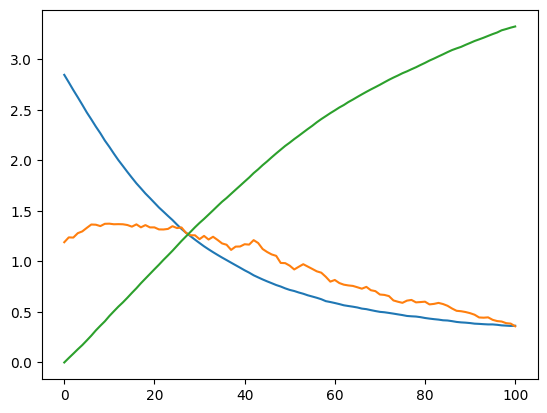

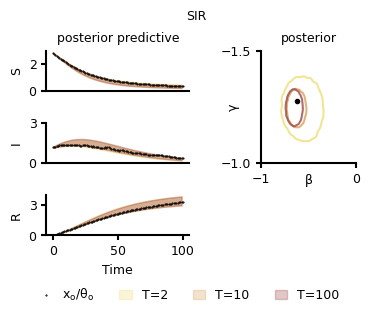

In [84]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


# color1 = "#440154"
# color2 = "#5ec962"
# color3 = "#fde725"
color1 = "#EEDF7A"
color2 = "#D8A25E"
color3 = "#A04747"
lw = 1.2


with use_style("pyloric"):

    # Create the figure
    fig = plt.figure(figsize=(4., 2.4))

    # Define a 3x2 grid with GridSpec (3 rows, 2 columns)
    gs = gridspec.GridSpec(3, 2, figure=fig, width_ratios=[1.8, 1.2])  # width_ratios controls the relative width

    # Create the three long plots on the left (single column each)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_ylabel('S')

    ax1.set_title("posterior predictive")
    ax1.plot(x_o[:,0],marker=".", linestyle="", color="black", markersize=1)
    ax1.fill_between(jnp.arange(100), x_l1[:, 0], x_u1[:,0], color=color1, alpha=0.3)
    ax1.fill_between(jnp.arange(100), x_l2[:, 0], x_u2[:,0], color=color2, alpha=0.3)
    ax1.fill_between(jnp.arange(100), x_l3[:, 0], x_u3[:,0], color=color3, alpha=0.3)
    # ax1.plot(x_l1[:,0], color=color1, lw=lw, alpha=0.8)
    # ax1.plot(x_u1[:,0], color=color1, lw=lw, alpha=0.8)
    # ax1.plot(x_l2[:,0], color=color2, lw=lw, alpha=0.8)
    # ax1.plot(x_u2[:,0], color=color2, lw=lw, alpha=0.8)
    # ax1.plot(x_l3[:,0], color=color3, lw=lw, alpha=0.8)
    # ax1.plot(x_u3[:,0], color=color3, lw=lw, alpha=0.8)
    ax1.set_xticks([])
    ax1.set_xticklabels([])
    ax1.set_ylim(0,3)
    ax1.set_yticks([0,2])


    ax2 = fig.add_subplot(gs[1, 0])
    ax2.set_ylabel('I')

    ax2.plot(x_o[:,1], marker=".", linestyle="", color="black", markersize=1)
    ax2.fill_between(jnp.arange(100), x_l1[:, 1], x_u1[:,1], color=color1, alpha=0.3)
    ax2.fill_between(jnp.arange(100), x_l2[:, 1], x_u2[:,1], color=color2, alpha=0.3)
    ax2.fill_between(jnp.arange(100), x_l3[:, 1], x_u3[:,1], color=color3, alpha=0.3)
    # ax2.plot(x_l1[:,1], color=color1, lw=lw, alpha=0.8)
    # ax2.plot(x_u1[:,1], color=color1, lw=lw, alpha=0.8)
    # ax2.plot(x_l2[:,1], color=color2, lw=lw, alpha=0.8)
    # ax2.plot(x_u2[:,1], color=color2, lw=lw, alpha=0.8)
    # ax2.plot(x_l3[:,1], color=color3, lw=lw, alpha=0.8)
    # ax2.plot(x_u3[:,1], color=color3, lw=lw, alpha=0.8)
    ax2.set_xticks([])
    ax2.set_xticklabels([])
    ax2.set_ylim(0,3)
    ax2.set_yticks([0,3])

    ax3 = fig.add_subplot(gs[2, 0])
    ax3.set_ylabel('R')

    ax3.plot(x_o[:,2], marker=".", linestyle="", color="black", markersize=1)
    ax3.fill_between(jnp.arange(100), x_l1[:, 2], x_u1[:,2], color=color1, alpha=0.3)
    ax3.fill_between(jnp.arange(100), x_l2[:, 2], x_u2[:,2], color=color2, alpha=0.3)
    ax3.fill_between(jnp.arange(100), x_l3[:, 2], x_u3[:,2], color=color3, alpha=0.3)
    # ax3.plot(x_l1[:,2], color=color1, lw=lw)
    # ax3.plot(x_u1[:,2], color=color1, lw=lw)
    # ax3.plot(x_l2[:,2], color=color2, lw=lw)
    # ax3.plot(x_u2[:,2], color=color2, lw=lw)
    # ax3.plot(x_l3[:,2], color=color3, lw=lw)
    # ax3.plot(x_u3[:,2], color=color3, lw=lw)
    ax3.set_xlabel("Time")
    ax3.set_ylim(0,4)
    ax3.set_yticks([0,3])

    # Create the big plot on the right (spanning all 3 rows in the second column)
    ax4 = fig.add_subplot(gs[:2, 1])
    ax4.set_title('posterior')

    sns.kdeplot(x=samples1[:,0], y=samples1[:,1], color=color1, levels=1, alpha=0.8, ax=ax4)
    sns.kdeplot(x=samples2[:,0], y=samples2[:,2], color=color2, levels=1, alpha=0.8, ax=ax4)
    sns.kdeplot(x=samples3[:,0], y=samples3[:,2], color=color3, levels=1, alpha=0.8, ax=ax4)
    ax4.scatter(theta_o[0], theta_o[1], color="black")
    ax4.set_ylabel(r"$\gamma$", labelpad=-15)
    ax4.set_xlabel(r"$\beta$", labelpad=-10)
    ax4.set_xlim(-1., 0.)
    ax4.set_ylim(-1.,-1.5)
    ax4.set_yticks([-1.5, -1.])
    ax4.set_xticks([-1.,0.])
    
    ax3.legend([r"$x_o$/$\theta_o$", "T=2", "T=10", "T=100"], loc="upper center", ncol=4, bbox_to_anchor=[1., -1.], handlelength=1)

    


    # Adjust spacing between the plots
    plt.subplots_adjust(wspace=0.6, hspace=0.8)
    fig.suptitle("SIR", y=1.05)
    fig.savefig("sir_fig.svg", transparent=True)
    # Show the plots
    plt.show()

In [68]:
x_o.shape

(101, 3)